In [1]:
import pandas as pd


In [4]:
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data_list =[]

df1 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.cleveland.data", names = column_names)
df2 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.hungarian.data", names = column_names)
df3 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.switzerland.data", names = column_names)
df4 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.va.data", names = column_names)


df1_1= df1.append(df2)
df2_2= df3.append(df4)

df_final= df1_1.append(df2_2)


print(df_final.head())

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  63.0  1.0  1.0      145  233   1       2     150     0     2.3     3  0.0   
1  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
2  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
3  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
4  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   

  thal  num  
0  6.0    0  
1  3.0    2  
2  7.0    1  
3  3.0    0  
4  3.0    0  


In [5]:
print(df_final.info())
print(df_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB
None
(920, 14)


In [6]:
print(df_final.describe())

              age         sex          cp         num
count  920.000000  920.000000  920.000000  920.000000
mean    53.510870    0.789130    3.250000    0.995652
std      9.424685    0.408148    0.930969    1.142693
min     28.000000    0.000000    1.000000    0.000000
25%     47.000000    1.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000    1.000000
75%     60.000000    1.000000    4.000000    2.000000
max     77.000000    1.000000    4.000000    4.000000


In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [8]:
#"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"
df_final=df_final.drop(['ca'],axis=1)
df_final=df_final.drop(['thal'],axis=1)
df_1=df_final[df_final.trestbps!= '?']
df_2=df_1[df_1.chol!='?']
df_2=df_2[df_2.fbs!='?']
df_2=df_2[df_2.restecg!='?']
df_2=df_2[df_2.thalach!='?']
df_2=df_2[df_2.exang!='?']
df_2=df_2[df_2.oldpeak!='?']
df_2=df_2[df_2.slope!='?']




In [9]:
data = df_2[df_2.num!=4]

print(data.describe())
data.num.value_counts()

              age         sex          cp         num
count  510.000000  510.000000  510.000000  510.000000
mean    54.656863    0.754902    3.333333    1.011765
std      8.796650    0.430568    0.916272    1.050708
min     29.000000    0.000000    1.000000    0.000000
25%     48.250000    1.000000    3.000000    0.000000
50%     55.000000    1.000000    4.000000    1.000000
75%     61.000000    1.000000    4.000000    2.000000
max     77.000000    1.000000    4.000000    3.000000


0    207
1    161
3     71
2     71
Name: num, dtype: int64

In [11]:
data.to_csv('pre2.csv', encoding='utf-8')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [6]:
d=pd.read_csv('/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/Datasets/heart.csv')
#Desktop/IDP/IDP_3-2 finals/Algorithm/Datasets/three.csv

In [7]:
d.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
X = d.drop(['target'], axis=1)
y = d['target']

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.35, random_state=42)

In [10]:
#X.to_csv('X_train.csv', encoding='utf-8')

In [52]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [53]:
classifier = KNeighborsClassifier(n_neighbors =17)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.87


In [129]:
classifier_man = KNeighborsClassifier(n_neighbors =17, metric = 'minkowski', p = 1)
classifier_man = classifier_man.fit(X_train,y_train)
y_pred = classifier_man.predict(X_test)

In [130]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


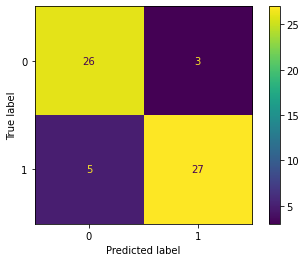

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_man, X_test, y_test)  
plt.show() 

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [143]:
df_model = d.copy()#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [144]:
X = df_model.drop(['target'], axis=1)
y = df_model['target']

In [145]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state=42)

In [154]:
f_c = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)

In [155]:
print(accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)


0.8688524590163934


0.8701508620689655

In [156]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,41):
    f_c = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan', p = 1)
    score=cross_val_score(f_c,X,y,cv=10)
    knn_scores.append(score.mean())

In [157]:
knn_scores


[0.712258064516129,
 0.709247311827957,
 0.775483870967742,
 0.7491397849462366,
 0.7850537634408602,
 0.7651612903225807,
 0.7782795698924732,
 0.7520430107526882,
 0.7850537634408603,
 0.7651612903225806,
 0.7786021505376344,
 0.7620430107526881,
 0.8017204301075269,
 0.7621505376344085,
 0.7853763440860215,
 0.7689247311827957,
 0.7853763440860215,
 0.7819354838709678,
 0.785483870967742,
 0.7951612903225806,
 0.7821505376344087,
 0.7887096774193548,
 0.7953763440860214,
 0.7953763440860214,
 0.7951612903225806,
 0.7919354838709678,
 0.7887096774193548,
 0.7886021505376345,
 0.7920430107526881,
 0.7952688172043011,
 0.785483870967742,
 0.785483870967742,
 0.7790322580645161,
 0.7988172043010753,
 0.7855913978494623,
 0.7921505376344087,
 0.792258064516129,
 0.792258064516129,
 0.7921505376344087,
 0.7921505376344087]

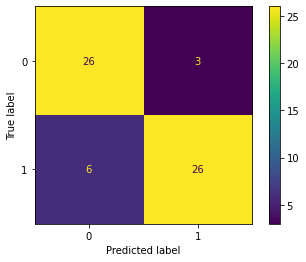

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(f_c, X_test, y_test)  
plt.show() 

In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[79, 16,  4],
       [23, 25,  7],
       [15, 16, 17]], dtype=int64)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=21)
rf = rf.fit(X_train,y_train)
score=cross_val_score(rf,X,y,cv=10)
score.mean()

0.7721505376344087

In [34]:
rf_scores=[]
for k in range(1,30):
    rf=RandomForestClassifier(n_estimators=k)
    score=cross_val_score(rf,X,y,cv=10)
    rf_scores.append(score.mean())

In [35]:
rf_scores

[0.6995698924731182,
 0.6734408602150537,
 0.738494623655914,
 0.7329032258064517,
 0.7090322580645161,
 0.7491397849462367,
 0.7529032258064516,
 0.7389247311827957,
 0.7658064516129033,
 0.7888172043010753,
 0.7589247311827958,
 0.762258064516129,
 0.749247311827957,
 0.7852688172043012,
 0.7917204301075269,
 0.7690322580645162,
 0.7787096774193548,
 0.7823655913978496,
 0.7523655913978494,
 0.7721505376344087,
 0.7687096774193549,
 0.7618279569892473,
 0.7820430107526881,
 0.759247311827957,
 0.7623655913978495,
 0.7588172043010752,
 0.785483870967742,
 0.7886021505376344,
 0.7654838709677418]

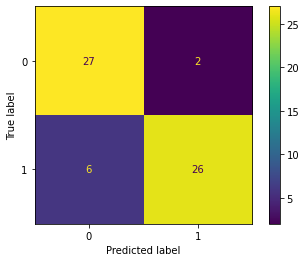

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

Accuracy: 0.84


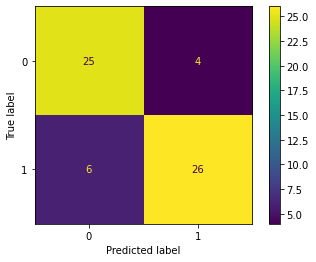

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



clf = SVC(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [87]:
import pickle


In [88]:
with open("model1_predictis",'wb')as f:
    pickle.dump(classifier,f)